<a href="https://colab.research.google.com/github/Adii1508/LGMVIP-Web/blob/main/wine_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns

In [1]:
!pip install jupyter-dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.8 MB/s eta 0:00:00


In [70]:
# Read dataset
data = pd.read_csv('/wine-class.csv')

In [71]:
# Check the size
data.shape

(178, 14)

In [72]:
data.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [73]:
data.min()

class                              1.00
alcohol                           11.03
 malic_acid                        0.74
 ash                               1.36
 alcalinity_of_ash                10.60
 magnesium                        70.00
 total_phenols                     0.98
 flavanoids                        0.34
 nonflavanoid_phenols              0.13
 proanthocyanins                   0.41
 color_intensity                   1.28
 hue                               0.48
 od280/od315_of_diluted_wines      1.27
 proline                         278.00
dtype: float64

In [74]:
data.max()

class                               3.00
alcohol                            14.83
 malic_acid                         5.80
 ash                                3.23
 alcalinity_of_ash                 30.00
 magnesium                        162.00
 total_phenols                      3.88
 flavanoids                         5.08
 nonflavanoid_phenols               0.66
 proanthocyanins                    3.58
 color_intensity                   13.00
 hue                                1.71
 od280/od315_of_diluted_wines       4.00
 proline                         1680.00
dtype: float64

In [75]:
# Check missing values
data.isnull().sum()

class                            0
alcohol                          0
 malic_acid                      0
 ash                             0
 alcalinity_of_ash               0
 magnesium                       3
 total_phenols                   0
 flavanoids                      0
 nonflavanoid_phenols            0
 proanthocyanins                 0
 color_intensity                 0
 hue                             2
 od280/od315_of_diluted_wines    7
 proline                         0
dtype: int64

In [76]:
df = data.fillna(0,inplace=True)

In [77]:
data.isnull().sum()

class                            0
alcohol                          0
 malic_acid                      0
 ash                             0
 alcalinity_of_ash               0
 magnesium                       0
 total_phenols                   0
 flavanoids                      0
 nonflavanoid_phenols            0
 proanthocyanins                 0
 color_intensity                 0
 hue                             0
 od280/od315_of_diluted_wines    0
 proline                         0
dtype: int64

In [78]:
# Input features
X = data.drop('class', axis=1)

In [79]:
# Output
y = data['class']

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

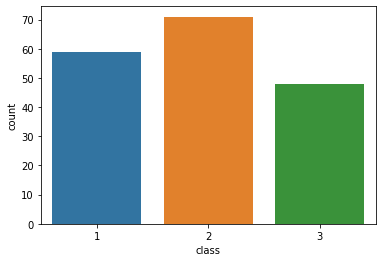

In [80]:
sns.countplot(y)

In [82]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [83]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   alcohol                        178 non-null    float64
 1    malic_acid                    178 non-null    float64
 2    ash                           178 non-null    float64
 3    alcalinity_of_ash             178 non-null    float64
 4    magnesium                     178 non-null    float64
 5    total_phenols                 178 non-null    float64
 6    flavanoids                    178 non-null    float64
 7    nonflavanoid_phenols          178 non-null    float64
 8    proanthocyanins               178 non-null    float64
 9    color_intensity               178 non-null    float64
 10   hue                           178 non-null    float64
 11   od280/od315_of_diluted_wines  178 non-null    float64
 12   proline                       178 non-null    int

In [84]:
# Transpose
Xt = X.T

In [85]:
# Find duplicated values
print(Xt.duplicated().sum())

0


In [86]:
unique_features = Xt.drop_duplicates(keep='first').T

In [87]:
unique_features.shape
X = unique_features

In [88]:
X.shape

(178, 13)

In [89]:
correlated_features = set()
correlation_matrix = data.corr(method='spearman') # use pearson correlation

In [90]:
correlation_matrix

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
class,1.000000,-0.354167,0.346913,-0.053988,0.569792,-0.185361,-0.726544,-0.854908,0.474205,-0.570648,0.131170,-0.578111,-0.606782,-0.576383
alcohol,-0.354167,1.000000,0.140430,0.243722,-0.306598,0.302390,0.310920,0.294740,-0.162207,0.192734,0.635425,-0.050655,0.033416,0.633580
malic_acid,0.346913,0.140430,1.000000,0.230674,0.304069,0.095044,-0.280225,-0.325202,0.255236,-0.244825,0.290307,-0.538952,-0.242647,-0.057466
ash,-0.053988,0.243722,0.230674,1.000000,0.366374,0.290616,0.132193,0.078796,0.145583,0.024384,0.283047,-0.042809,-0.032578,0.253163
alcalinity_of_ash,0.569792,-0.306598,0.304069,0.366374,1.000000,-0.164647,-0.376657,-0.443770,0.389390,-0.253695,-0.073776,-0.317907,-0.244157,-0.456090
magnesium,-0.185361,0.302390,0.095044,0.290616,-0.164647,1.000000,0.194028,0.167965,-0.234381,0.149370,0.305213,-0.022184,0.024309,0.431905
total_phenols,-0.726544,0.310920,-0.280225,0.132193,-0.376657,0.194028,1.000000,0.879404,-0.448013,0.666689,0.011162,0.412453,0.597590,0.419470
flavanoids,-0.854908,0.294740,-0.325202,0.078796,-0.443770,0.167965,0.879404,1.000000,-0.543897,0.730322,-0.042910,0.502567,0.637489,0.429904
nonflavanoid_phenols,0.474205,-0.162207,0.255236,0.145583,0.389390,-0.234381,-0.448013,-0.543897,1.000000,-0.384629,0.059639,-0.238659,-0.433813,-0.270112
proanthocyanins,-0.570648,0.192734,-0.244825,0.024384,-0.253695,0.149370,0.666689,0.730322,-0.384629,1.000000,-0.030947,0.325933,0.463643,0.308249


In [91]:
# Remove uncorrelated features
X.drop(' ash', axis=1, inplace=True)

In [92]:
X.shape

(178, 12)

In [93]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [94]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X, y)

In [95]:
features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

[[   1.71   15.6     3.06    5.64 1065.  ]
 [   1.78   11.2     2.76    4.38 1050.  ]
 [   2.36   18.6     3.24    5.68 1185.  ]
 [   1.95   16.8     3.49    7.8  1480.  ]
 [   2.59   21.      2.69    4.32  735.  ]]


In [96]:

cols = [' alcalinity_of_ash',' magnesium',' flavanoids',
        ' color_intensity',' proline' ]

In [97]:
X = X[cols]

In [98]:
X.head()

,alcalinity_of_ash,magnesium,flavanoids,color_intensity,proline
0,15.6,127.0,3.06,5.64,1065.0
1,11.2,100.0,2.76,4.38,1050.0
2,18.6,101.0,3.24,5.68,1185.0
3,16.8,113.0,3.49,7.80,1480.0
4,21.0,118.0,2.69,4.32,735.0


In [99]:
from sklearn.ensemble import IsolationForest
isf = IsolationForest(n_estimators=100, random_state=0)
isf = isf.fit(X)
clean = isf.predict(X)

In [100]:
X = X[clean==1]
y = y[clean==1]

In [101]:
X.shape

(160, 5)

In [102]:
from imblearn.over_sampling import RandomOverSampler, SMOTE 

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

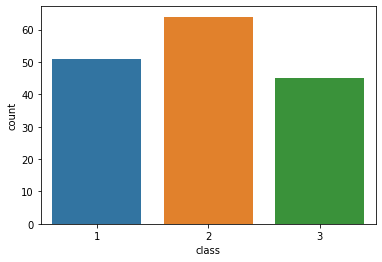

In [103]:
sns.countplot(y)

In [104]:
rus = RandomOverSampler(random_state = 0) 
X_res, y_res = rus.fit_resample(X, y) 
   
X_res = pd.DataFrame(X_res) 
Y_res = pd.DataFrame(y_res) 

In [105]:
X_res.shape

(192, 5)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

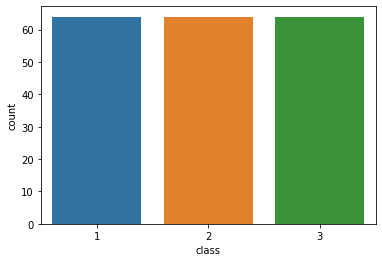

In [106]:
sns.countplot(y_res)

In [107]:
X.head()

,alcalinity_of_ash,magnesium,flavanoids,color_intensity,proline
0,15.6,127.0,3.06,5.64,1065.0
1,11.2,100.0,2.76,4.38,1050.0
2,18.6,101.0,3.24,5.68,1185.0
4,21.0,118.0,2.69,4.32,735.0
5,15.2,112.0,3.39,6.75,1450.0


In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_s = scaler.fit_transform(X_res)

In [109]:
# Cross validation
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(
    X_s, y_res, random_state = 0)

In [111]:
X_train.shape

(144, 5)

In [112]:
X_test.shape

(48, 5)

In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [115]:
#classifier = GaussianNB() # Normal
classifier = KNeighborsClassifier(n_neighbors=5)

In [116]:
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [117]:
y_pred = classifier.predict(X_test)

In [118]:
y_pred

array([2, 2, 1, 2, 3, 2, 1, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 2, 3, 3, 2, 3,
       3, 3, 3, 3, 1, 3, 1, 1, 1, 2, 2, 1, 1, 1, 3, 3, 2, 1, 2, 2, 2, 3,
       3, 2, 1, 1])

In [119]:
from sklearn.metrics import confusion_matrix

In [120]:
confusion_matrix(y_test, y_pred)

array([[17,  0,  0],
       [ 1, 13,  1],
       [ 0,  0, 16]])

In [121]:
from sklearn.metrics import classification_report

In [122]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        17
           2       1.00      0.87      0.93        15
           3       0.94      1.00      0.97        16

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48



In [123]:
from sklearn.metrics import accuracy_score

In [124]:
accuracy_score(y_test, y_pred) * 100

95.83333333333334

In [129]:
pip install sklearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=95659e9c32a2e9640aea6f2f9730e0387c01ab407fc030cbf827ca04ef397e43
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [131]:
pip install joblib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [137]:
pip install --prefix /usr/local joblib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [138]:
import joblib

In [139]:
outputfile = 'wine.model'

In [140]:
joblib.dump(classifier, outputfile, compress=9) 

['wine.model']

In [141]:
new = [[18.50,3.0,0.7,5.28,675]]
new = scaler.transform(new)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [142]:
classifier.predict(new)

array([2])

In [143]:
data.iloc[132,:]

class                              3.00
alcohol                           12.81
 malic_acid                        2.31
 ash                               2.40
 alcalinity_of_ash                24.00
 magnesium                        98.00
 total_phenols                     1.15
 flavanoids                        1.09
 nonflavanoid_phenols              0.27
 proanthocyanins                   0.83
 color_intensity                   5.70
 hue                               0.66
 od280/od315_of_diluted_wines      1.36
 proline                         560.00
Name: 132, dtype: float64

In [144]:
y_train[67]

2